#  CRYPTO PRICE PREDICTION USING LSTM AND GRU

In [1]:
# Importing necessary libraries
import pandas as pd # for data manipulation and analysis
import plotly.graph_objects as go # for interactive visualization of historical data
from plotly.subplots import make_subplots #  for creating subplots
import numpy as np # for data manipulation
from sklearn.preprocessing import MinMaxScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
import tensorflow as tf # for building and training LSTM and GRU model
from sklearn.metrics import mean_squared_error, mean_absolute_error # for evaluating model performance
import math # for mathematical operations
import time # for time-related operations
%matplotlib inline

In [2]:
# Importing cryptocurrencies historical prices datasets
# the "Date" column will be parsed as a datetime object
data_usdt = pd.read_csv('/content/Tether Hist Data.csv', parse_dates = ['Date']) # USDT
data_btc = pd.read_csv('/content/Bitcoin Hist Data.csv', parse_dates = ['Date']) # BTC
data_ltc = pd.read_csv('/content/Litecoin Hist Data.csv', parse_dates = ['Date']) # LTC
data_eth = pd.read_csv('/content/Ethereum Hist Data.csv', parse_dates = ['Date']) # ETH
data_xrp = pd.read_csv('/content/Ripple Hist Data.csv', parse_dates = ['Date']) # XRP

# Data inspection

In [3]:
data_usdt.head() # top 5 rows of USDT prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
1,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
2,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
3,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032
4,2017-11-14,1.00524,1.01343,0.996898,1.00683,1.00683,429857984


In [4]:
data_btc.head() # top 5 rows of BTC prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700


In [5]:
data_ltc.head() # top 5 rows of LTC prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2.69743,2.69924,2.66385,2.66736,2.66736,855392
1,2015-01-03,2.66646,2.66646,2.13316,2.13316,2.13316,5193080
2,2015-01-04,2.11022,2.15446,1.91241,1.95668,1.95668,3888140
3,2015-01-05,1.95803,2.16048,1.95803,2.08218,2.08218,10649500
4,2015-01-06,2.08434,2.11824,2.04454,2.11212,2.11212,3242950


In [6]:
data_eth.head() # top 5 rows of ETH prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
1,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
3,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
4,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000


In [7]:
data_xrp.head() # top 5 rows of XRP prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
1,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
3,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
4,2017-11-14,0.203679,0.213693,0.203679,0.209825,0.209825,127361000


Dataset features:
- Date: The day on which the data was recorded.
- Open: Opening crypto price on a particular day.
- High: Highest crypto price on a particular day.
- Low: Lowest crypto price on a particular day.
- Close: Closing crypto price on a particular day.
- Adj Close: Adjusted closing crypto price on a particular day. This accounts for any corporate actions like stock splits or new stock offerings.
- Volume: The number of crypto units traded on a particular day.

In [8]:
# Structure and content summary of BTC historical dataset
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3154 non-null   datetime64[ns]
 1   Open       3154 non-null   float64       
 2   High       3154 non-null   float64       
 3   Low        3154 non-null   float64       
 4   Close      3154 non-null   float64       
 5   Adj Close  3154 non-null   float64       
 6   Volume     3154 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 172.6 KB


- The Bitcoin dataset has 3154 rows.
- All columns have 3154 non-null values, indicating that there are no missing values.

In [9]:
# Structure and content summary of USDT historical dataset
data_usdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2111 non-null   datetime64[ns]
 1   Open       2111 non-null   float64       
 2   High       2111 non-null   float64       
 3   Low        2111 non-null   float64       
 4   Close      2111 non-null   float64       
 5   Adj Close  2111 non-null   float64       
 6   Volume     2111 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 115.6 KB


In [10]:
# summary statistics of BTC historical dataset
data_btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3.154000e+03
mean,14276.410040,14619.111448,13900.320118,14283.202252,14283.202252,1.708781e+10
std,16084.003573,16481.207233,15629.388322,16080.259196,16080.259196,1.948538e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1054.910004,1082.614990,1038.152496,1056.152527,1056.152527,2.528400e+08
50%,8198.461914,8317.527832,7965.949463,8202.903808,8202.903808,1.218791e+10
75%,21671.867676,22154.021973,21152.341308,21708.694824,21708.694824,2.795114e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Focus is on 'Close' price column, as we'll use it as our target feature while training the models.
- The maximum closing price of bitcoin is 67566.8
- The minimum closing price is 178.1
- The mean is at 14283.2, and
- The standard deviation 16080.2, which means that bitcoin closing prices have a high variance

In [11]:
# summary statistics of UDST historical dataset
data_usdt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2.111000e+03
mean,1.001430,1.006715,0.996844,1.001433,1.001433,3.974950e+10
std,0.005453,0.009931,0.007515,0.005408,0.005408,3.629951e+10
min,0.972522,0.978690,0.899490,0.966644,0.966644,4.298580e+08
25%,0.999983,1.000606,0.995171,0.999990,0.999990,1.247480e+10
50%,1.000405,1.002204,0.999271,1.000386,1.000386,3.198894e+10
75%,1.002147,1.010445,1.000037,1.002057,1.002057,5.712699e+10
max,1.080950,1.105910,1.021830,1.077880,1.077880,2.790675e+11


In [12]:
# Checking for missing values in the BTC historical dataset.
data_btc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- No missing value in data_btc dataset

In [13]:
# Checking for missing values in the USDT historical dataset.
data_usdt.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- No missing value in data_usdt dataset

# Visualization of historical data.
The market behavior of each cryptocurrency over time.

In [14]:
# Plotly USDT Close price chart
# Create a subplot with one trace (line chart)
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(x = data_usdt['Date'], y = data_usdt['Close'], mode = 'lines', name = 'USDT Close Price')

# Add the trace to the subplot
fig.add_trace(trace)

# Update layout
fig.update_layout(
    title = 'Historical USDT Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Show the plot
fig.show()

Historical USDT closing price trends from November 10, 2017, to August 21, 2023.

In [15]:
# Plotly BTC Close price chart
# Create a subplot with one trace (line chart)
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(x = data_btc['Date'], y = data_btc['Close'], mode = 'lines', name = 'BTC Close Price')

# Add the trace to the subplot
fig.add_trace(trace)

# Update layout
fig.update_layout(
    title = 'Historical BTC Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Show the plot
fig.show()

Historical Bitcoin closing price trends from January 02, 2015, to August 21, 2023.

In [16]:
# Plotly LTC Close price chart
# Create a subplot with one trace (line chart)
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(x = data_ltc['Date'], y = data_ltc['Close'], mode = 'lines', name = 'LTC Close Price')

# Add the trace to the subplot
fig.add_trace(trace)

# Update layout
fig.update_layout(
    title = 'Historical LTC Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Show the plot
fig.show()

Historical Litecoin closing price trends from January 02, 2015, to August 21, 2023.

In [17]:
# Plotly ETH Close price chart
# Create a subplot with one trace (line chart)
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(x = data_eth['Date'], y = data_eth['Close'], mode = 'lines', name = 'ETH Close Price')

# Add the trace to the subplot
fig.add_trace(trace)

# Update layout
fig.update_layout(
    title = 'Historical ETH Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Show the plot
fig.show()

Historical Ethereum closing price trends from November 10, 2017, to August 21, 2023.

In [18]:
# Plotly XRP Close price chart
# Create a subplot with one trace (line chart)
fig = make_subplots(rows = 1, cols = 1)
trace = go.Scatter(x = data_xrp['Date'], y = data_xrp['Close'], mode = 'lines', name = 'XRP Close Price')

# Add the trace to the subplot
fig.add_trace(trace)

# Update layout
fig.update_layout(
    title = 'Historical XRP Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Show the plot
fig.show()

Historical Ripple closing price trends from November 10, 2017, to August 21, 2023.

# Data preprocessing
Tranforming the data for model building.

As the most popular cryptocurrency, we use Bitcoin dataset as the starting point for model building. Later, other cryptocurrencies will be adapted using the same procedures.

In [19]:
# set Date column as index
data_btc.set_index('Date', inplace = True)

In [20]:
data_btc.head() # first 5 rows of Bitcoin dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700


In [21]:
# Define train_test_split() function to split the Bitcoin dataset into
# training = 80% and test = 20%
def train_test_split(data, test_size):
  train_size = len(data) - int(len(data)*test_size)
  train_set = data.iloc[:train_size]
  test_set = data.iloc[train_size:]
  return train_set, test_set
# split the data_btc dataset
train_set, test_set = train_test_split(data_btc, 0.2)

In [22]:
train_set.shape, test_set.shape

((2524, 6), (630, 6))

The Bitcoin train_set has 2524 rows and 6 columns, while the test_set has 630 rows and 6 columns.

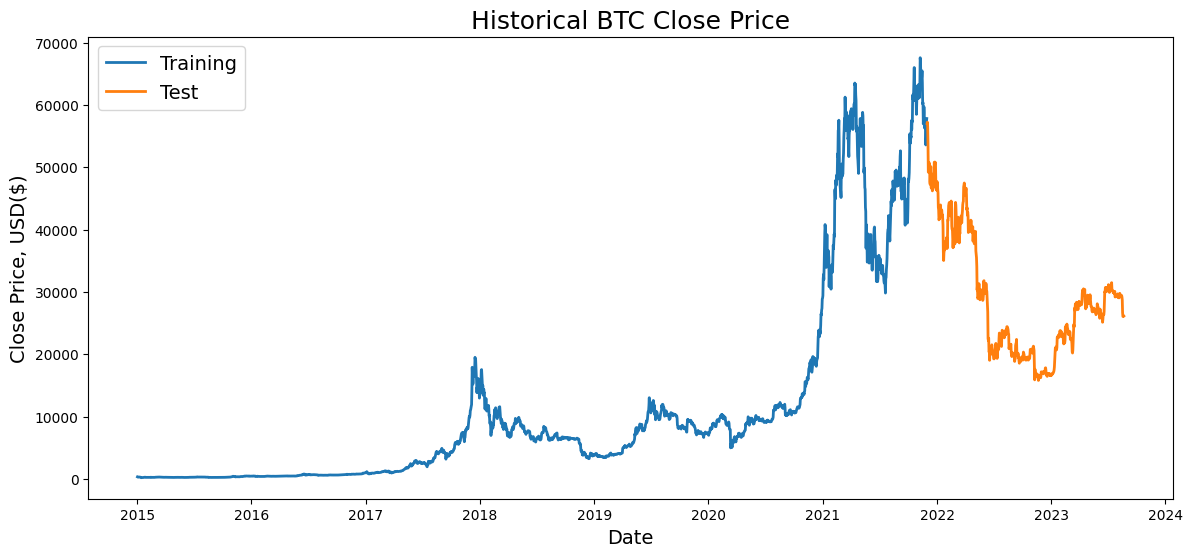

In [23]:
# Visualize the training and test portions of the Bitcoin dataset using line plot
# Simple line plot for 'Close' price column
def line_graph(firstline, secondline, label1, label2, title, lw = 2):
  fig, ax = plt.subplots(1, figsize = (14, 6))
  ax.plot(firstline, label = label1, linewidth = lw)
  ax.plot(secondline, label = label2, linewidth = lw)
  ax.set_xlabel('Date', fontsize = 14)
  ax.set_ylabel('Close Price, USD($)', fontsize = 14)
  ax.set_title(title, fontsize = 18)
  ax.legend(loc = 'upper left', fontsize = 14)
line_graph(train_set['Close'], test_set['Close'], 'Training', 'Test', 'Historical BTC Close Price')

In [24]:
# Standardize the training and test sets using MinMaxScaler() function
# This will help avoid outliers or anomalies and improve model performance
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train_set)
test_scaled = sc.fit_transform(test_set)

In [25]:
# Define a function to create sequences
# Define the sequence length and number of features
# train_size = int(len(data_btc)*0.8)
n_steps = 1  # Number of time steps in each input sequence
features = 6  # Number of columns/features in each time step

def create_sequences(data_scaled, target_col_index, n_steps):
  x_seq, y_seq = [], []
  for i in range(n_steps, len(data_scaled)):
    x_seq.append(data_scaled[i - n_steps:i, :])
    y_seq.append(data_scaled[i, target_col_index])
  return np.array(x_seq), np.array(y_seq)

# Create sequences for the training and test sets
x_train, y_train = create_sequences(train_scaled, 4, n_steps)
x_test, y_test = create_sequences(test_scaled, 4, n_steps)

# Reshape the training and test sets to fit the models' input shape
x_train = np.reshape(x_train, (x_train.shape[0], n_steps, features))
x_test = np.reshape(x_test, (x_test.shape[0], n_steps, features))

# LSTM Model

- We create a sequential model using the Sequential() function from tf.keras.models to allow for the sequential addition of model layers.
- Add an LSTM layer with 128 units (neurons). We use the Rectified Linear Unit (ReLU) activation function to capture non-linear relationships in the sequences. We also use 'sigmoid' recurrent activation function to control the model's information flow.
- Add a Dense layer with one unit (neuron). This serves as the output layer.

In [26]:
# Model building
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 128, input_shape = (n_steps, features),
                               activation = 'relu', recurrent_activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(1))

- We compile the model using the 'Adam' optimizer and the 'mean_squared_error' loss function.

In [27]:
# Model compiling
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

- We train the model for 100 epochs with a batch size of 64.

In [28]:
# Model fitting
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 64,
                 validation_data = (x_test, y_test), verbose = 1)

Epoch 1/100
40/40 [==============================] - 3s 13ms/step - loss: 0.0319 - val_loss: 0.0097
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 2.4008e-04 - val_loss: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 1.9921e-04 - val_loss: 9.8165e-04
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 1.9362e-04 - val_loss: 9.4865e-04
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 1.8900e-04 - val_loss: 9.0016e-04
Epoch 7/100
40/40 [==============================] - 0s 6ms/step - loss: 1.8542e-04 - val_loss: 8.4964e-04
Epoch 8/100
40/40 [==============================] - 0s 6ms/step - loss: 1.8400e-04 - val_loss: 8.0115e-04
Epoch 9/100
40/40 [==============================] - 0s 7ms/step - loss: 1.7671e-04 - val_loss: 7.4533e-04
Epoch 10/100
40/40 [==============================] - 0s

In [29]:
# Predictions on test set
y_pred = model.predict(x_test)

20/20 [==============================] - 0s 2ms/step


In [30]:
# Inverse transform to get unscaled test target and predicted values
y_test_unscaled = sc.inverse_transform(np.hstack((test_scaled[n_steps:, :4],
                                                  y_test.reshape(-1, 1),
                                                  test_scaled[n_steps:, 5:])))[:, 4]
y_pred_unscaled = sc.inverse_transform(np.hstack((test_scaled[n_steps:, :4],
                                                  y_pred,
                                                  test_scaled[n_steps:, 5:])))[:, 4]

In [31]:
# Defining return_rmse() function that takes in test and predicted arguments and
# prints out the root mean square error (rmse) metric
def return_rmse(test, predicted):
  rmse = np.sqrt(mean_squared_error(test, predicted))
  print('The root mean squared error is {:.2f}.'.format(rmse))

In [32]:
return_rmse(y_test_unscaled, y_pred_unscaled)

The root mean squared error is 985.18.


In [33]:
# Visualize results
# Actual vs Predicted values
train_size = int(len(data_btc)*0.8)
fig = go.Figure()
fig.add_trace(go.Scatter(x = data_btc.index[train_size + n_steps:],
                         y = y_test_unscaled, name = 'Actual'))
fig.add_trace(go.Scatter(x = data_btc.index[train_size + n_steps:],
                         y = y_pred_unscaled, name = 'Predicted'))
fig.update_layout(title = 'Actual vs Predicted BTC Close price Values',
                  xaxis_title = 'Date',
                  yaxis_title = 'Close Price ($)',
                  title_x = 0.5,
                  title_font_size = 20,
                  xaxis_title_font_size = 14,
                  yaxis_title_font_size = 14)
fig.update_xaxes(tickformat = '%d/%m/%Y') # date format
fig.show()

- The above plot is a comparison of the actual and predicted Bitcoin closing prices on the test dataset.